In [1]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
heart = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
original = heart

In [4]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
# Missing values check
heart.isna().sum().sum()

0

In [7]:
heart.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
#heart =  heart[heart.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })

In [9]:
#heart['Diabetic'] = heart['Diabetic'].astype(int)
#heart['Diabetic']

In [10]:
# Age catgory should not be categorical so making it continuous

newAgeCategory = {'55-59':57, '80 or older':80, '65-69':67,'75-79':77,'40-44':42,'70-74':72,'60-64':62,
                  '50-54':52,'45-49':47,'18-24':21,'35-39':37,'30-34':32,'25-29':27}
heart['AgeCategory'] = heart['AgeCategory'].apply(lambda x: newAgeCategory[x])
heart['AgeCategory'] = heart['AgeCategory'].astype('float')

Categorical Features:
HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

Continuous Features:
BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime

In [11]:
# Column stats for continuous data

heart.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'AgeCategory', 'SleepTime']].T.style.background_gradient(cmap='Blues')


,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
AgeCategory,54.355759,17.720429,21.000000,42.000000,57.000000,67.000000,80.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [12]:
# Column stats for categorical data

fig = make_subplots(rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking","AlcoholDrinking","Stroke",
                    "DiffWalking", "Sex",'Race', 'Diabetic','PhysicalActivity','GenHealth','Asthma', 
                    'KidneyDisease','SkinCancer'),
specs=[[{"type": "domain"}, {"type": "domain"}],[{"type": "domain"}, {"type": "domain"}],
      [{"type": "domain"}, {"type": "domain"}],[{"type": "domain"}, {"type": "domain"}],
      [{"type": "domain"}, {"type": "domain"}],[{"type": "domain"}, {"type": "domain"}],
      [{"type": "domain"}, {"type": "domain"}]],)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(heart['HeartDisease'].value_counts().index),
                     values=[x for x in heart['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['Smoking'].value_counts().index),
                     values=[x for x in heart['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['AlcoholDrinking'].value_counts().index),
                     values=[x for x in heart['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['Stroke'].value_counts().index),
                     values=[x for x in heart['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['DiffWalking'].value_counts().index),
                     values=[x for x in heart['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['Sex'].value_counts().index),
                     values=[x for x in heart['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['Race'].value_counts().index),
                     values=[x for x in heart['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['PhysicalActivity'].value_counts().index),
                     values=[x for x in heart['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['Diabetic'].value_counts().index),
                     values=[x for x in heart['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['GenHealth'].value_counts().index),
                     values=[x for x in heart['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['Asthma'].value_counts().index),
                     values=[x for x in heart['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(heart['KidneyDisease'].value_counts().index),
                     values=[x for x in heart['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(heart['SkinCancer'].value_counts().index),
                     values=[x for x in heart['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),row=7, col=1)

fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

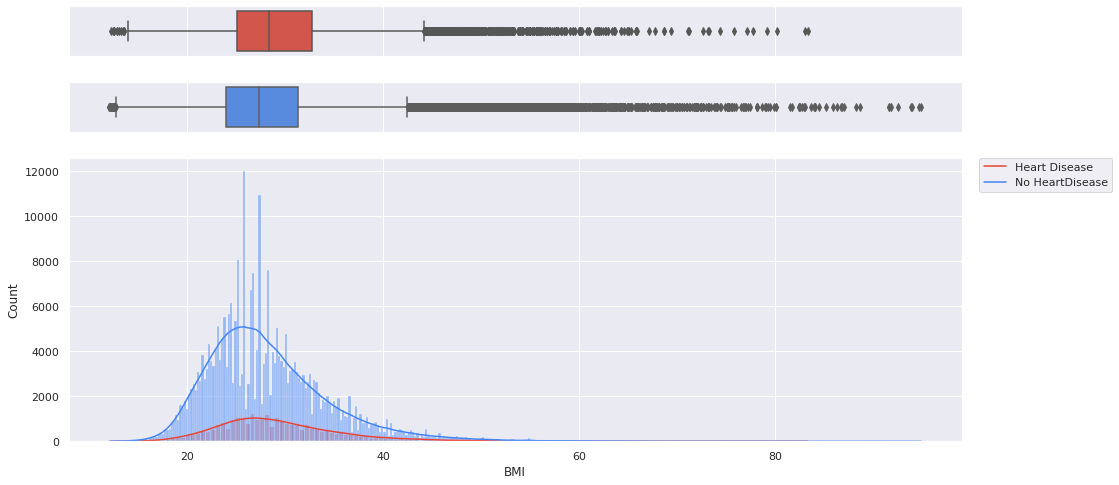

In [13]:
#Visualisation of continuous data

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=heart[heart['HeartDisease']=="Yes"]["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(heart[heart['HeartDisease']=="Yes"], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=heart[heart['HeartDisease']=="No"]["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(heart[heart['HeartDisease']=="No"], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

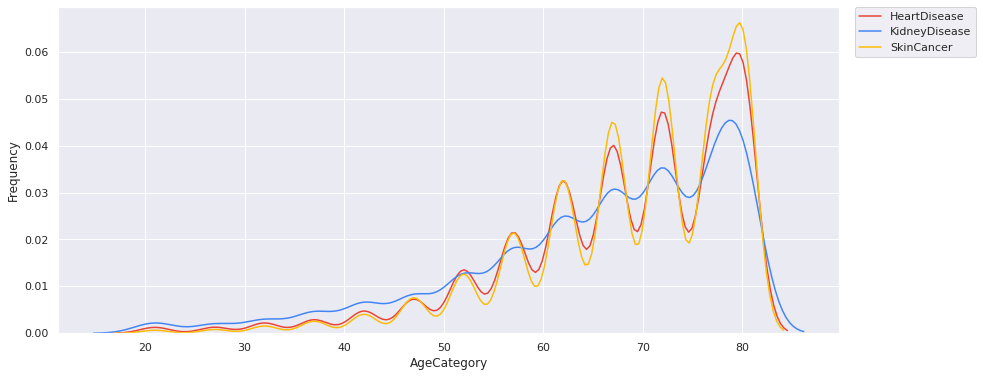

In [14]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["AgeCategory"], alpha=1,shade = False, color="#ea4335", label="HeartDisease", ax = ax)
sns.kdeplot(heart[heart["KidneyDisease"]=="Yes"]["AgeCategory"], alpha=1,shade = False, color="#4285f4", label="KidneyDisease", ax = ax)
sns.kdeplot(heart[heart["SkinCancer"]=="Yes"]["AgeCategory"], alpha=1,shade = False, color="#fbbc05", label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

People found to have heart disease, skin cancer and kidney disease are mostly old people

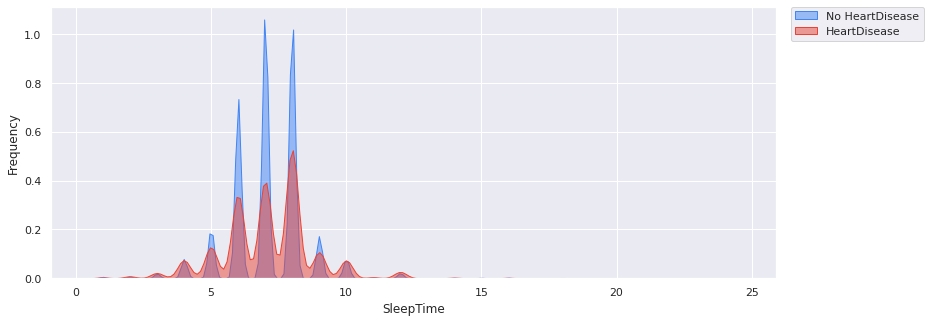

In [15]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart[heart["HeartDisease"]=="No"]["SleepTime"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["SleepTime"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

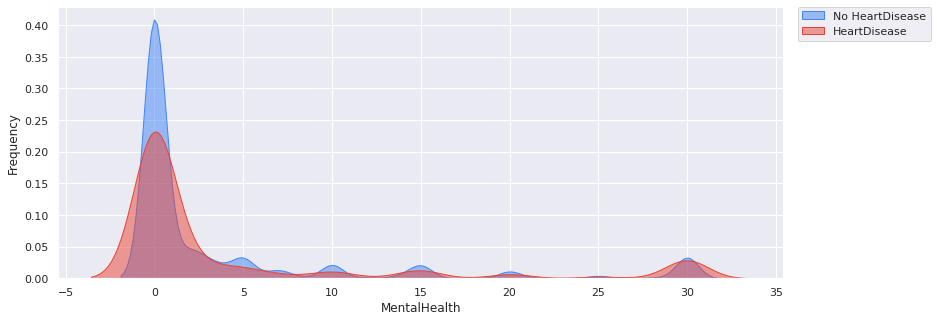

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart[heart["HeartDisease"]=="No"]["MentalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["MentalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

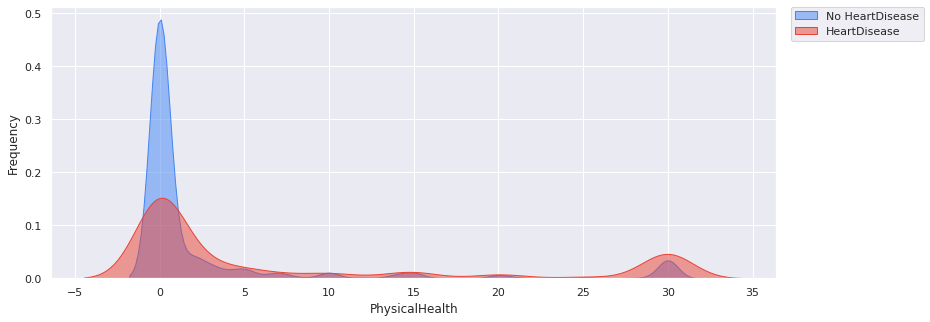

In [17]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(heart[heart["HeartDisease"]=="No"]["PhysicalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(heart[heart["HeartDisease"]=="Yes"]["PhysicalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

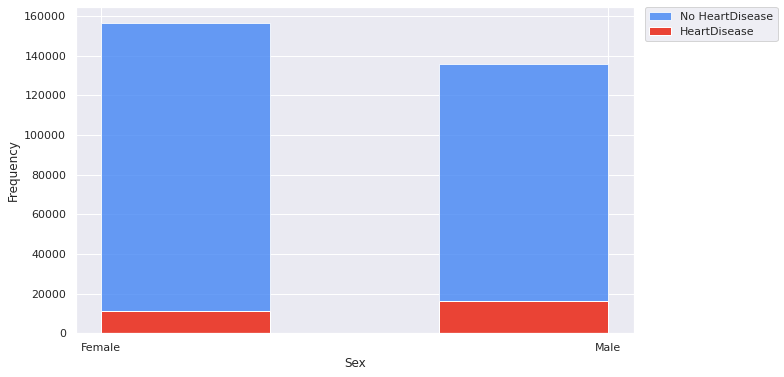

In [18]:
#Visualisation of Categorical data

fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [19]:
female_with_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Sex']=="Female")])
num_female = len(heart[heart['Sex']=="Female"])
male_with_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Sex']=="Male")])
num_male = len(heart[heart['Sex']=="Male"])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738



1.   Most heart disease patients are Male than Females
2.   More Females were tested than males
3.   Males are approximately 1.6 times more likely to have heart disease than females





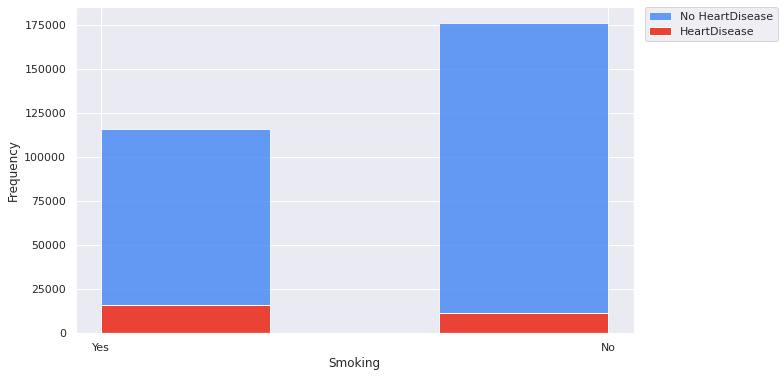

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [21]:
smoke_and_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Smoking']=="Yes")])
num_smoke = len(heart[heart['Smoking']=="Yes"])
no_smoke_and_heart_disease = len(heart[(heart['HeartDisease']=="Yes") & (heart['Smoking']=="No")])
num_no_smoke = len(heart[heart['Smoking']=="No"])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


1.   Most heart disease patients smoke
2.   People who smoke are approximately twice as likely to have heart disease than people who don't smoke.



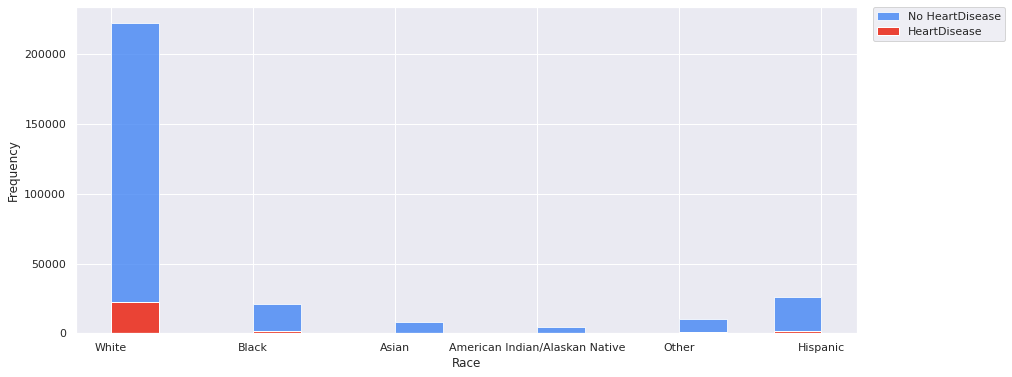

In [22]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Most heart disease patients are white people.

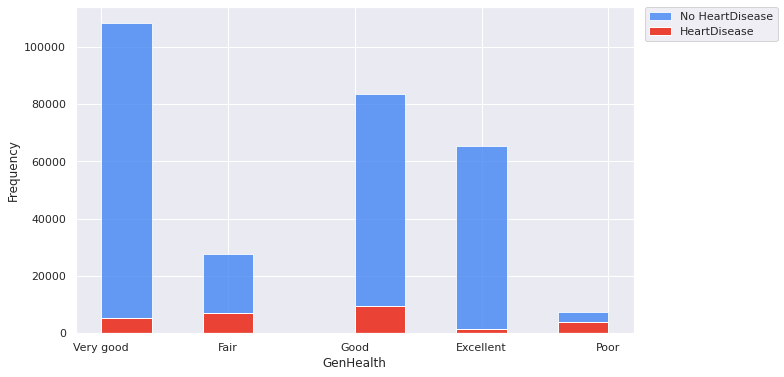

In [23]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

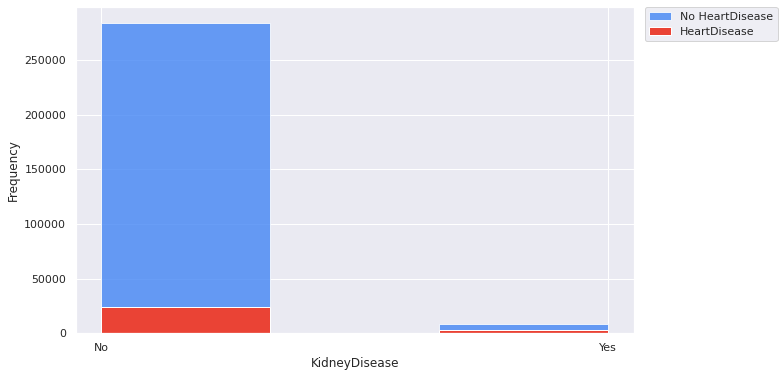

In [24]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["KidneyDisease"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["KidneyDisease"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Most of the people tested have no kidney disease

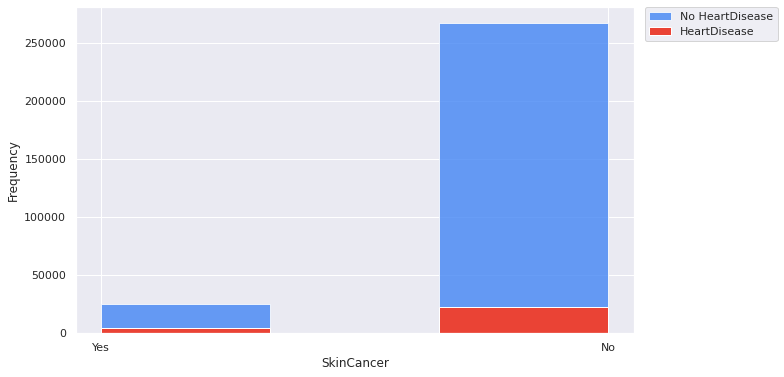

In [25]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["SkinCancer"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["SkinCancer"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

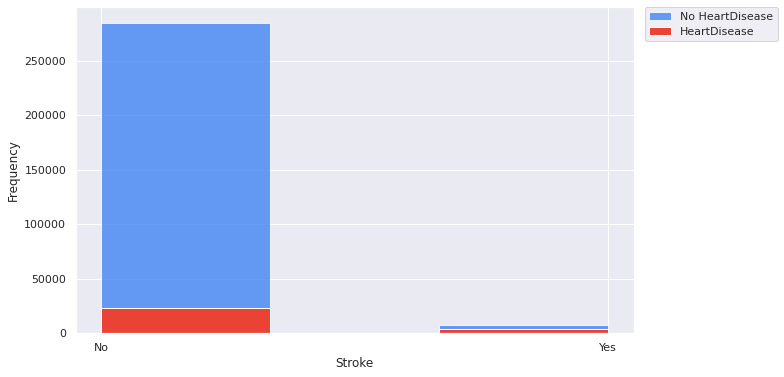

In [26]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Stroke"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Stroke"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

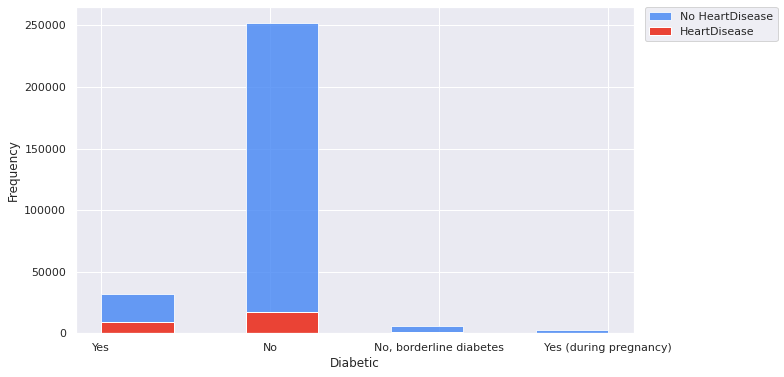

In [27]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Diabetic"], bins=7, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Diabetic"], bins=7, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

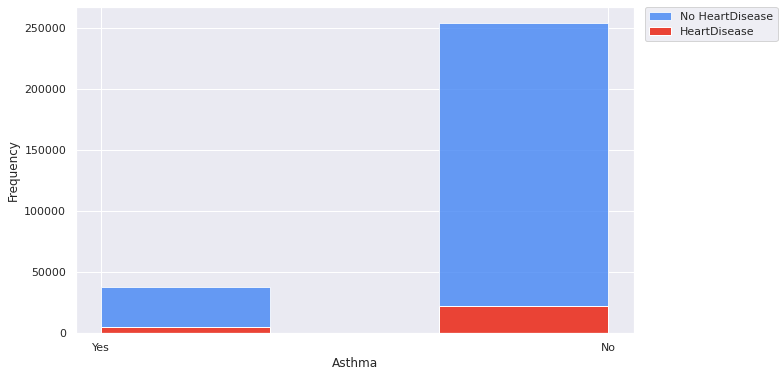

In [28]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["Asthma"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["Asthma"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

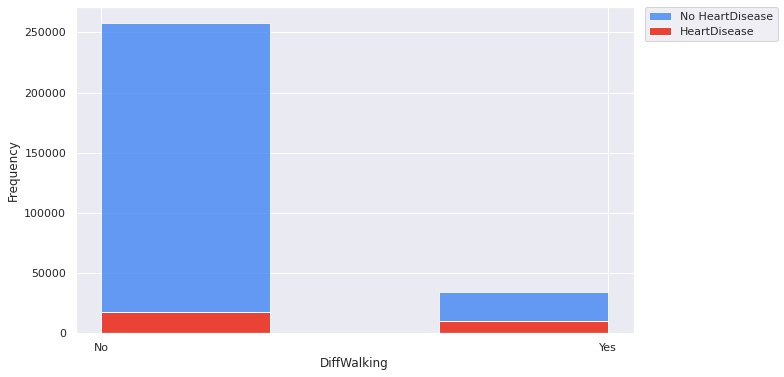

In [29]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["DiffWalking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["DiffWalking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

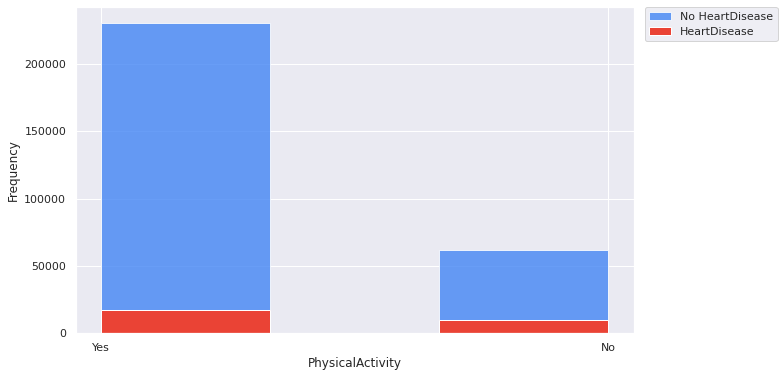

In [30]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

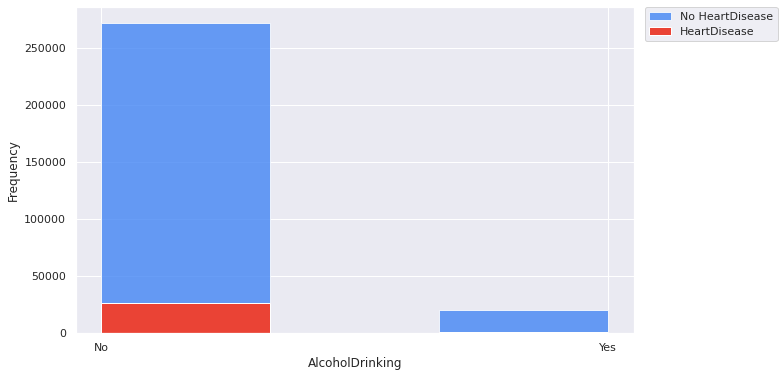

In [31]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart[heart["HeartDisease"]=="No"]["AlcoholDrinking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart[heart["HeartDisease"]=="Yes"]["AlcoholDrinking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)